# Introdução

Neste estudo, buscaremos examinar os padrões emergentes, tendências e correlações entre as diversas variáveis presentes no conjunto de dados "Pima Indian Diabetes Prediction". Utilizando métodos estatísticos e ferramentas de visualização de dados, nossa meta principal é não apenas identificar os fatores mais impactantes relacionados à presença de diabetes, mas também fornecer insights práticos que possam embasar estratégias de prevenção e intervenção. A compreensão aprofundada dos padrões subjacentes presentes nos dados visa contribuir para a formulação de abordagens mais eficazes no diagnóstico precoce e no gerenciamento desta condição de saúde crítica.

# Importando as bibliotecas

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("diabetes.csv")

# Exploração inicial

In [3]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Tratamento de valores ausentes

In [6]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Visualizações

C:\Users\thiag\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


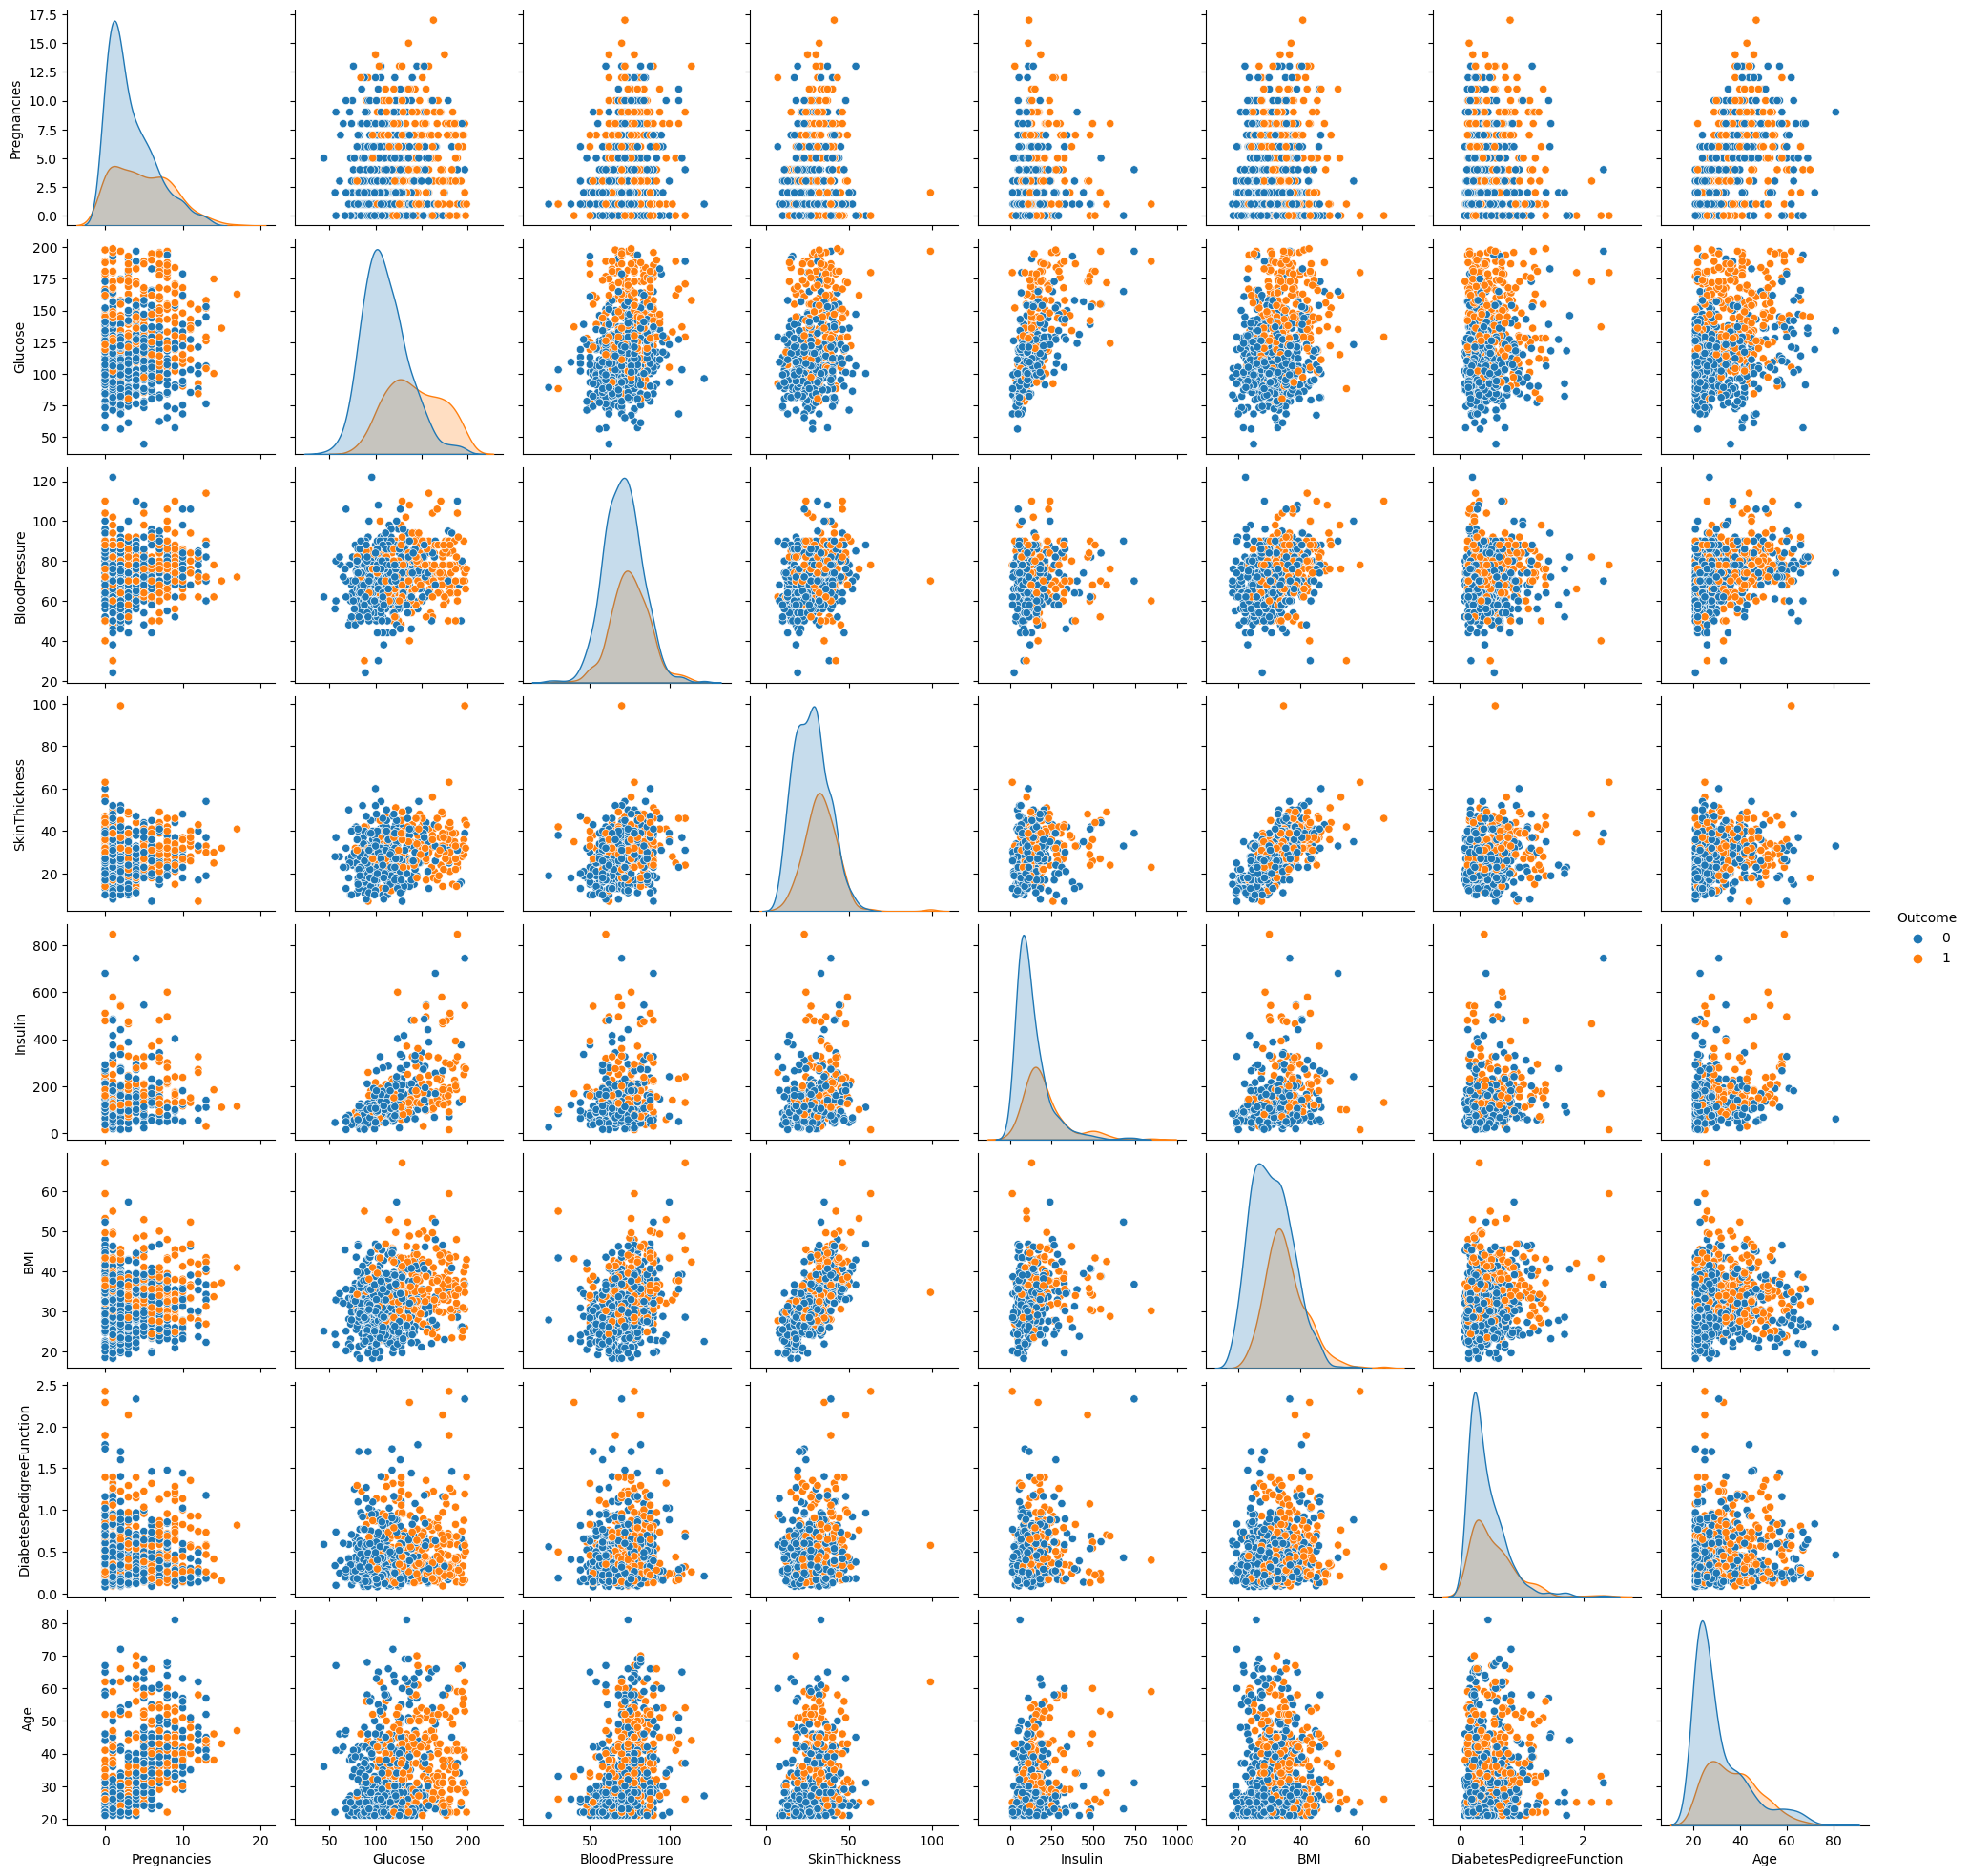

In [12]:
sns.pairplot(data, hue='Outcome')
plt.show()

# Analisando se há desiquilíbrio entre ter ou não diabetes

In [13]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


# Divisão dos dados

In [14]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Tratamento de valores ausentes
imputer = SimpleImputer(strategy='mean')  # Preencher NaN com a média dos valores existentes
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [18]:
# Modelo preditivo (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Avaliação do modelo
y_pred = model.predict(X_test_imputed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

Confusion Matrix:
 [[77 22]
 [18 37]]


In [27]:
# Tratamento de valores ausentes no conjunto de teste
X_test_imputed = imputer.transform(X_test)

# Curva ROC (Receiver Operating Characteristic) e AUC (Area Under the Curve)

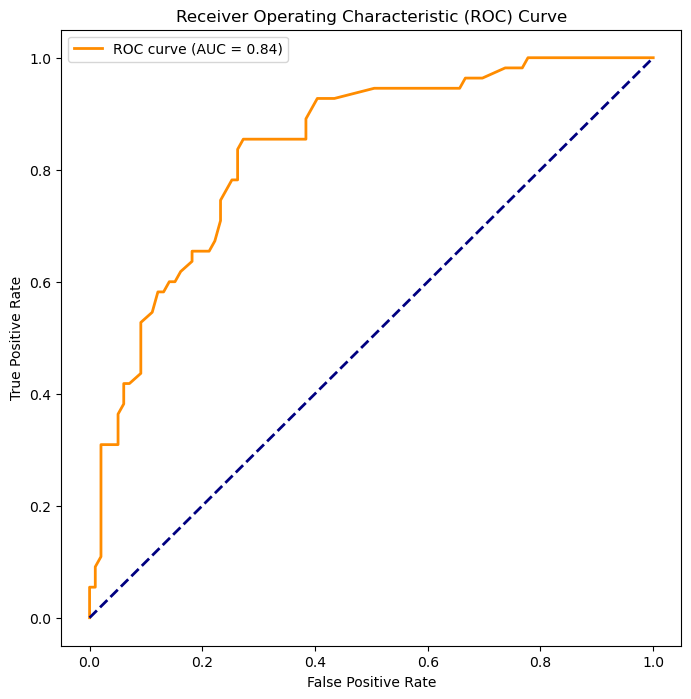

In [28]:
# Curva ROC e AUC
y_prob = model.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

O gráfico mostra como a taxa de verdadeiros positivos varia com a taxa de falsos positivos para diferentes limiares de probabilidade.

# Matriz de Confusão Normalizada

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

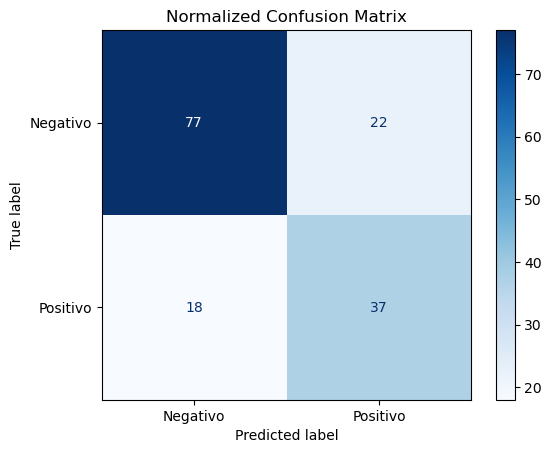

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=['Negativo', 'Positivo'])
disp.plot(cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.show()

Taxas de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos em relação ao total de instâncias

# Calibração do Modelo

In [48]:
from sklearn.calibration import calibration_curve

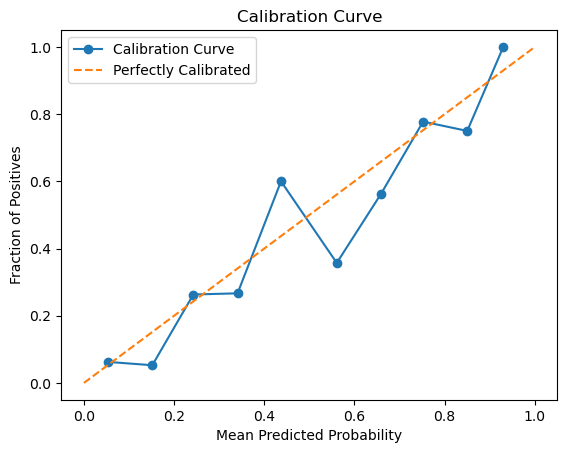

In [49]:
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

Relação entre as probabilidades previstas e a proporção real de instâncias positivas

# Conclusão

A análise do dataset "Pima Indian Diabetes Prediction" proporcionou uma compreensão aprofundada do conjunto de dados e do desempenho do modelo de Machine Learning. Inicialmente, exploramos as características principais, identificando variáveis relevantes para a previsão de diabetes em mulheres da comunidade Pima Indian. Em seguida, procedemos à preparação dos dados, tratando valores ausentes e escalonando as características para garantir um desempenho robusto do modelo.
Durante a modelagem, empregamos um algoritmo RandomForestClassifier para prever a ocorrência de diabetes. A avaliação do modelo revelou métricas promissoras, como uma precisão considerável, uma curva ROC-AUC robusta e uma pontuação F1 equilibrada. A análise da matriz de confusão forneceu insights sobre o desempenho do modelo em termos de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.
Em resumo, o modelo demonstrou habilidade em prever a ocorrência de diabetes com base nas características fornecidas. Contudo, é fundamental destacar a importância contínua de validar e aprimorar o modelo à medida que novos dados se tornam disponíveis, garantindo assim a sua relevância e eficácia ao longo do tempo.